<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Butter-filter" data-toc-modified-id="Butter-filter-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Butter filter</a></span></li><li><span><a href="#Welch's-periodogram" data-toc-modified-id="Welch's-periodogram-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Welch's periodogram</a></span></li><li><span><a href="#Welch's-periodogram-of-delta-band" data-toc-modified-id="Welch's-periodogram-of-delta-band-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Welch's periodogram of delta band</a></span></li><li><span><a href="#Average-band-power" data-toc-modified-id="Average-band-power-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Average band power</a></span></li><li><span><a href="#Generalization-to-method" data-toc-modified-id="Generalization-to-method-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Generalization to method</a></span></li></ul></div>

## Load data

In [1]:
import numpy as np
data = np.loadtxt('data.txt')

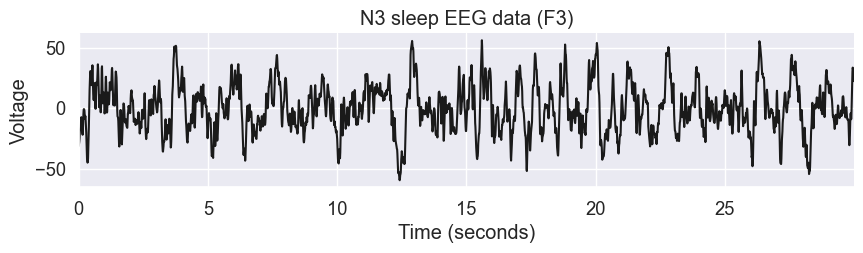

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.2)

# Define sampling frequence and time vector
# Based on Raphael's data, the sampling frequency is 100 Hz
sf = 100.
time = np.arange(data.size) / sf

# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (F3)')
sns.despine()

## Butter filter

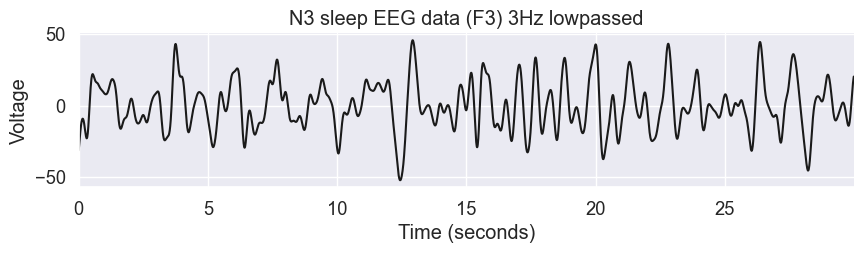

In [101]:
from scipy import signal
low_pass = 3
b, a = signal.butter(N=3, Wn=low_pass/(.5*sf), btype='low')
filtered_data = signal.filtfilt(b=b, a=a, x=data)

# plot the filtered signal
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
plt.plot(time, filtered_data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('N3 sleep EEG data (F3) 3Hz lowpassed')
sns.despine()

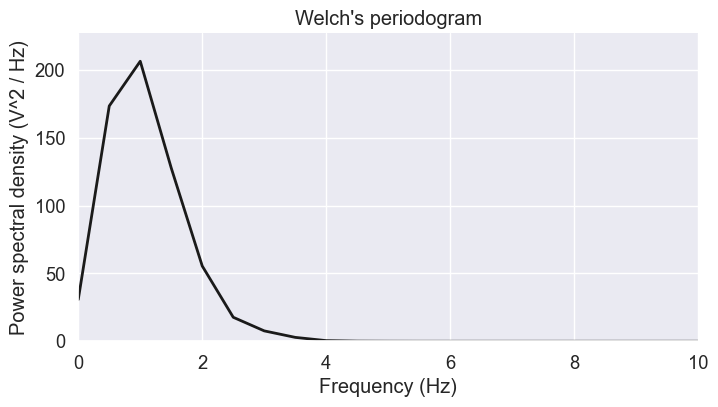

In [102]:
win = 2 * sf
freq, psd = signal.welch(filtered_data, sf, nperseg=win)

# Plot the spectrum
plt.figure(figsize=(8, 4))
plt.plot(freq, psd, lw=2, color='k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, 10])
sns.despine()

## Welch's periodogram

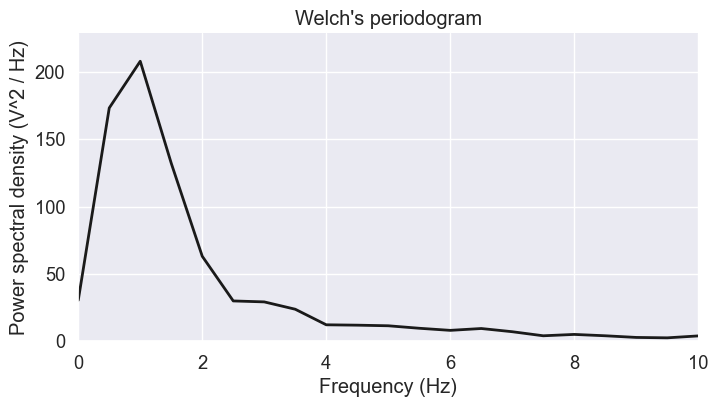

In [90]:
from scipy import  signal

# Define window length (4 seconds)
# Based on Raphael's tutorial, is 2 / 0.5 Hz = 4 seconds
win = 2 * sf
freq, psd = signal.welch(data, sf, nperseg=win)

# Plot the spectrum
plt.figure(figsize=(8, 4))
plt.plot(freq, psd, lw=2, color='k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.ylim([0, psd.max() * 1.1])
plt.title("Welch's periodogram")
plt.xlim([0, 10])
sns.despine()

In [13]:
freq

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
       22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
       27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32. , 32.5,
       33. , 33.5, 34. , 34.5, 35. , 35.5, 36. , 36.5, 37. , 37.5, 38. ,
       38.5, 39. , 39.5, 40. , 40.5, 41. , 41.5, 42. , 42.5, 43. , 43.5,
       44. , 44.5, 45. , 45.5, 46. , 46.5, 47. , 47.5, 48. , 48.5, 49. ,
       49.5, 50. ])

In [53]:
freq, T, Pxy = signal._spectral_py._spectral_helper(
    data, data, fs=sf, nperseg=sf*4, noverlap=sf*3.9)

In [51]:
T

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27.,
       28.])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_17508\1999314937.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('jet')


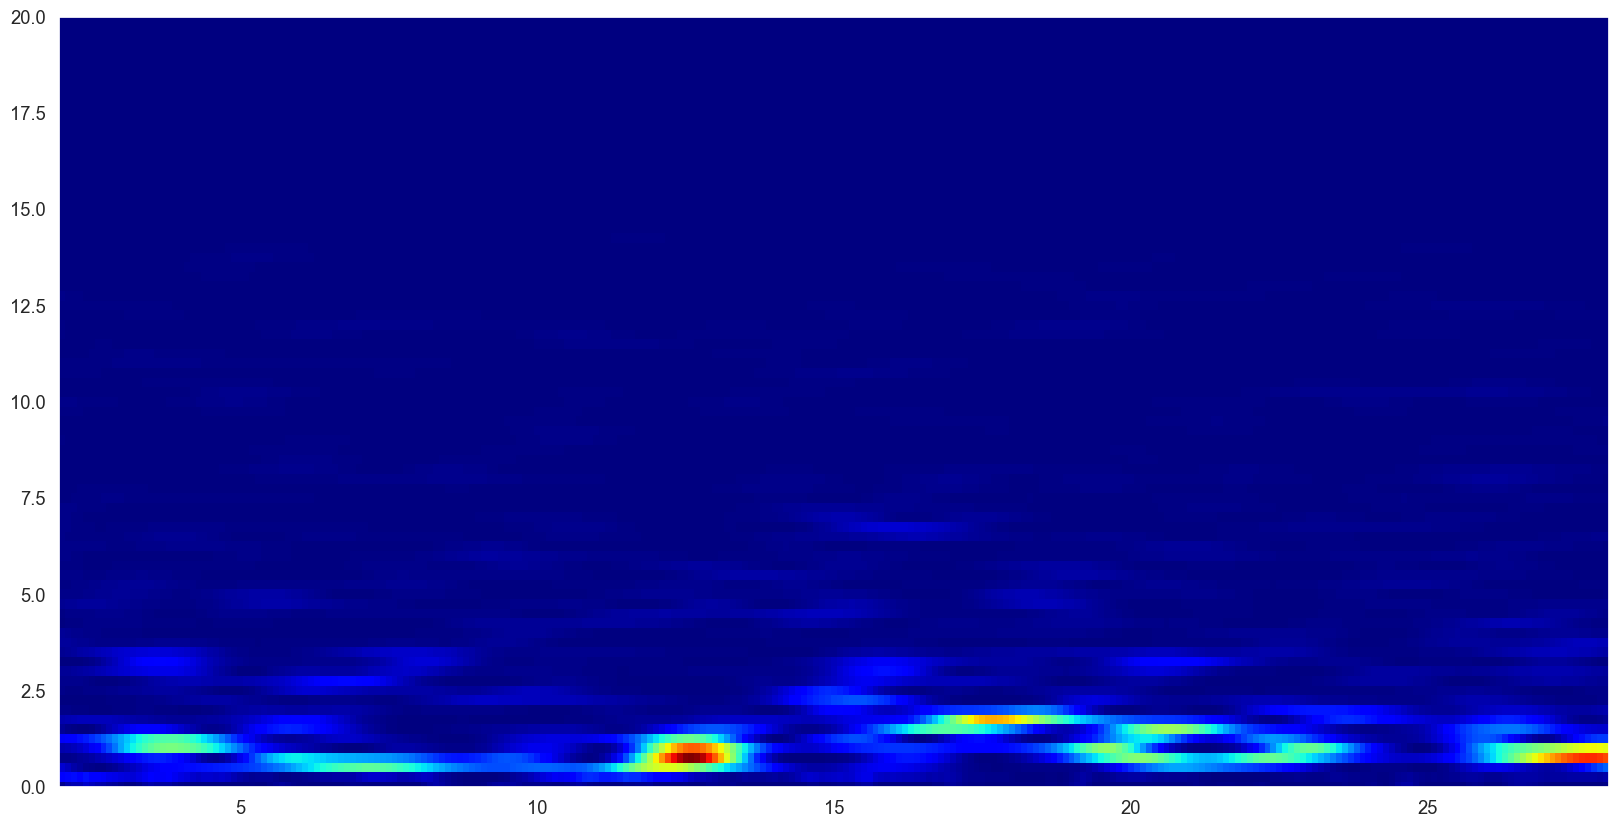

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))

cmap = plt.cm.get_cmap('jet')
ax.set_ylim([0, 20])
ax.pcolormesh(T, freq, Pxy, cmap=cmap)

## Welch's periodogram of delta band

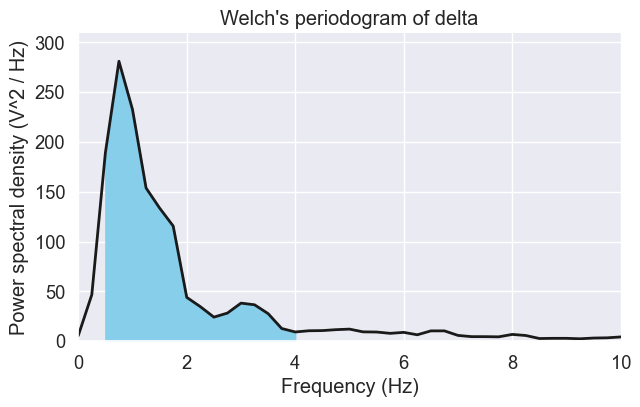

In [4]:
# Define delta lower and upper limits
low, high = 0.5, 4

# Find the intersecting values in frequency vector
idx_delta = np.logical_and(freq>=low, freq<=high)

# Plot the power spectral density and fill the delta area
plt.figure(figsize=(7, 4))
plt.plot(freq, psd, lw=2, color='k')
plt.fill_between(freq, psd, where=idx_delta, color='skyblue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power spectral density (V^2 / Hz)')
plt.xlim([0, 10])
plt.ylim([0, psd.max()*1.1])
plt.title("Welch's periodogram of delta")
sns.despine()

In [103]:
idx_delta

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Average band power

In [6]:
from scipy.integrate import simps

# Frequecy resolution
# Which in this case is 1/4 = 0.25
freq_res = freq[1] - freq[0]

# Compute the absolute power by approximating the area under the curve
# With the composite Simpson's rule
delta_power = simps(psd[idx_delta], dx=freq_res)
print('Absolute delta power: %.3f uv^2' % delta_power)

Absolute delta power: 321.064 uv^2


In [7]:
# Relative power
total_power = simps(psd, dx=freq_res)
delta_rel_power = delta_power / total_power
print('Relative delta power: %.3f' % delta_rel_power)

Relative delta power: 0.787


In [8]:
# But not use the sum of delta band / sum of all bands
error_delta_rel_power = np.sum(psd[idx_delta]) / np.sum(psd)
print('Error relative delta power: %.3f' % error_delta_rel_power)

Error relative delta power: 0.835


## Generalization to method

In [9]:
def bandpower(data, sf, band, window_sec=None, relative=False):
    """
    Compute the average power of the signal data in a specific frequency band
    
    Parameters
    ---------
    data: 1d-array
        Input signal in the time-domain.
    sf: float
        Sampling frequency of the data.
    band: list
        Lower and upper frequencies of the band of interest.
    window_sec: float
        Length of each slide window in seconds.
        If None, window_sec = (1 / min(band)) * 2
    relative: boolean
        If True, return the relative power, which is divided by the total 
        power of the signal.
        If False (default), return the absolute power
        
    Return
    ---------
    bp: float
        Absolute or relative band power
    """
    
    from scipy.signal import welch
    from scipy.integrate import simps
    
    band = np.asarray(band)
    low, high = band
    
    # Define the window length
    if window_sec is not None:
        nperseg = window_sec * sf
    else:
        nperseg = (2 / low) * sf
        
    # Compute the psd with Welch's method
    freqs, psd = welch(data, sf, nperseg=nperseg)
    
    # Frequency resolution
    freq_res = freqs[1] - freqs[0]
    
    # Find the closest indices of band in frequency vector
    idx_band = np.logical_and(freqs>=low, freqs<=high)
    
    # Integral approximation of the band power using the Simpson's rule
    bp = simps(psd[idx_band], dx=freq_res)
    
    if relative:
        bp /= simps(psd, dx=freq_res)
    
    return bp
    
    